In [1]:
import pandas as pd
from pathlib import Path

# Full path to the dataset
data_path = Path(r"C:\Users\Abhijeet\UIDAI-Data-Hackathon\UIDAI-Data-Hackathon\dataset\Biometric.csv")

# Check if the file exists
if not data_path.exists():
    raise FileNotFoundError(f"{data_path} not found")
    
# Load the dataset
df = pd.read_csv(data_path)
# Preview the first rows

df.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Maharashtra,Mumbai Suburban,400064,145,138
1,01-03-2025,Maharashtra,Mumbai Suburban,400050,122,203
2,01-03-2025,Maharashtra,Mumbai Suburban,400063,77,104
3,01-03-2025,Maharashtra,Mumbai Suburban,400095,203,355
4,01-03-2025,Maharashtra,Mumbai Suburban,400094,32,33


In [2]:
# -------------------------------
# Find unique values for all columns
# -------------------------------

for col in df.columns:
    unique_vals = df[col].unique()  # get all unique values
    num_unique = len(unique_vals)   # count of unique values
    num_missing = df[col].isnull().sum()  # missing values
    
    # Print column name, number of unique values, missing count, and first 10 unique values
    print(f"\nColumn: {col}")
    print(f"Unique count: {num_unique}")
    print(f"Missing values: {num_missing}")
    print(f"Sample unique values: {list(unique_vals[:10])}")



Column: date
Unique count: 230
Missing values: 0
Sample unique values: ['01-03-2025', '01-04-2025', '01-05-2025', '26-10-2025', '16-11-2025', '19-10-2025', '30-11-2025', '10-12-2025', '23-11-2025', '24-11-2025']

Column: state
Unique count: 1
Missing values: 0
Sample unique values: ['Maharashtra']

Column: district
Unique count: 1
Missing values: 0
Sample unique values: ['Mumbai Suburban']

Column: pincode
Unique count: 56
Missing values: 0
Sample unique values: [400064, 400050, 400063, 400095, 400094, 400065, 400069, 400055, 400054, 400079]

Column: bio_age_5_17
Unique count: 181
Missing values: 0
Sample unique values: [145, 122, 77, 203, 32, 109, 70, 205, 52, 83]

Column: bio_age_17_
Unique count: 174
Missing values: 0
Sample unique values: [138, 203, 104, 355, 33, 146, 67, 201, 58, 127]


In [9]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')


In [10]:
monthly_df = df.copy()
monthly_df['month'] = monthly_df['date'].dt.month
monthly_df['month_name'] = monthly_df['date'].dt.month_name()


In [11]:
monthly_df = monthly_df.drop(columns=['date'])


In [12]:
analysis_df = (
    monthly_df
    .groupby(['month', 'month_name'], as_index=False)
    [['bio_age_5_17', 'bio_age_17_']]
    .mean()
)
analysis_df


,month,month_name,bio_age_5_17,bio_age_17_
0,1,January,17.102151,9.268817
1,3,March,137.068966,176.982759
2,4,April,184.229508,184.311475
3,5,May,19.685007,20.867950
4,6,June,5.309252,7.453105
5,7,July,6.291742,7.447860
6,8,August,5.525157,5.855975
7,9,September,12.367895,7.435978
8,10,October,9.824096,7.692771
9,11,November,13.787824,8.168776


In [13]:
analysis_df['age_difference'] = (
    analysis_df['bio_age_17_'] - analysis_df['bio_age_5_17']
)


In [14]:
analysis_df.describe()


,month,bio_age_5_17,bio_age_17_,age_difference
count,11.000000,11.000000,11.000000,11.000000
mean,6.909091,38.521114,40.367571,1.846457
std,3.477198,61.466177,69.490863,13.041165
min,1.000000,5.309252,5.855975,-7.833333
25%,4.500000,8.057919,7.450483,-4.457382
50%,7.000000,12.540661,8.168776,0.081967
75%,9.500000,18.393579,15.068384,1.169531
max,12.000000,184.229508,184.311475,39.913793


In [ ]:
Monthly trend

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
# Replace 'your_file.csv' with the actual name of your file
file_path = Path(r"C:\Users\Abhijeet\UIDAI-Data-Hackathon\UIDAI-Data-Hackathon\dataset\Biometric.csv")
df = pd.read_csv(file_path)

# 2. Preprocess the data
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Create a 'month_year' column to group by (e.g., '2024-01')
df['month_year'] = df['date'].dt.to_period('M')

# 3. Aggregate data by Month
# We sum the biometric update counts for each month
monthly_trend = df.groupby('month_year')[['bio_age_5_17', 'bio_age_17_']].sum()

# 4. Plotting the Trend
plt.figure(figsize=(12, 6))

# Plot lines for both age groups
# We convert the index (Period) to string for the x-axis to avoid plotting issues
monthly_trend.plot(kind='line', marker='o', linewidth=2)

plt.title('Monthly Trend of Biometric Updates', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Count of Updates', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Bio Update Age 5-17', 'Bio Update Age 17+'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Print the data table
print("\nMonthly Trend Data:")
print(monthly_trend)

ValueError: time data "26-10-2025" doesn't match format "%m-%d-%Y", at position 3. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

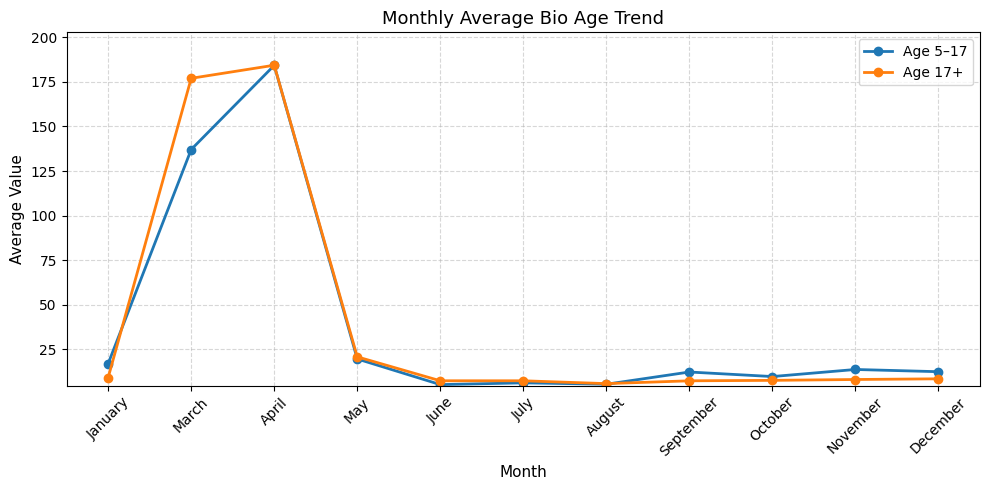

In [16]:
plt.figure(figsize=(10, 5))

plt.plot(
    analysis_df['month_name'],
    analysis_df['bio_age_5_17'],
    marker='o',
    linewidth=2,
    label='Age 5–17'
)

plt.plot(
    analysis_df['month_name'],
    analysis_df['bio_age_17_'],
    marker='o',
    linewidth=2,
    label='Age 17+'
)

plt.xlabel('Month', fontsize=11)
plt.ylabel('Average Value', fontsize=11)
plt.title('Monthly Average Bio Age Trend', fontsize=13)

# Improve y-axis scale automatically
plt.ylim(
    min(analysis_df[['bio_age_5_17', 'bio_age_17_']].min()) * 0.9,
    max(analysis_df[['bio_age_5_17', 'bio_age_17_']].max()) * 1.1
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


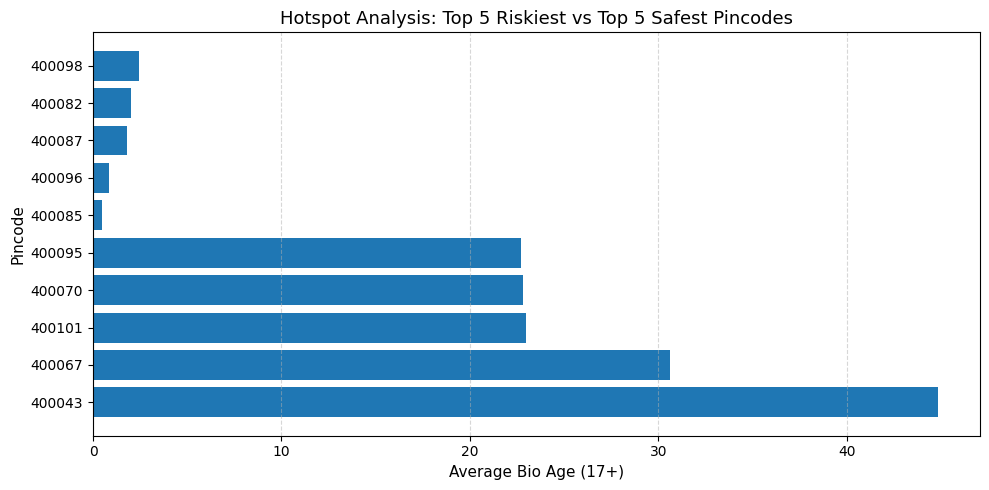

9.999838096009066

In [17]:
pincode_avg = (
    df.groupby('pincode')['bio_age_17_']
    .mean()
    .reset_index()
)
top_5_risky = pincode_avg.sort_values(
    by='bio_age_17_', ascending=False
).head(5)

top_5_safe = pincode_avg.sort_values(
    by='bio_age_17_', ascending=True
).head(5)
hotspot_df = pd.concat([top_5_risky, top_5_safe])
hotspot_df
plt.figure(figsize=(10, 5))

plt.barh(
    hotspot_df['pincode'].astype(str),
    hotspot_df['bio_age_17_']
)

plt.xlabel('Average Bio Age (17+)', fontsize=11)
plt.ylabel('Pincode', fontsize=11)
plt.title(
    'Hotspot Analysis: Top 5 Riskiest vs Top 5 Safest Pincodes',
    fontsize=13
)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
city_avg = df['bio_age_17_'].mean()
city_avg


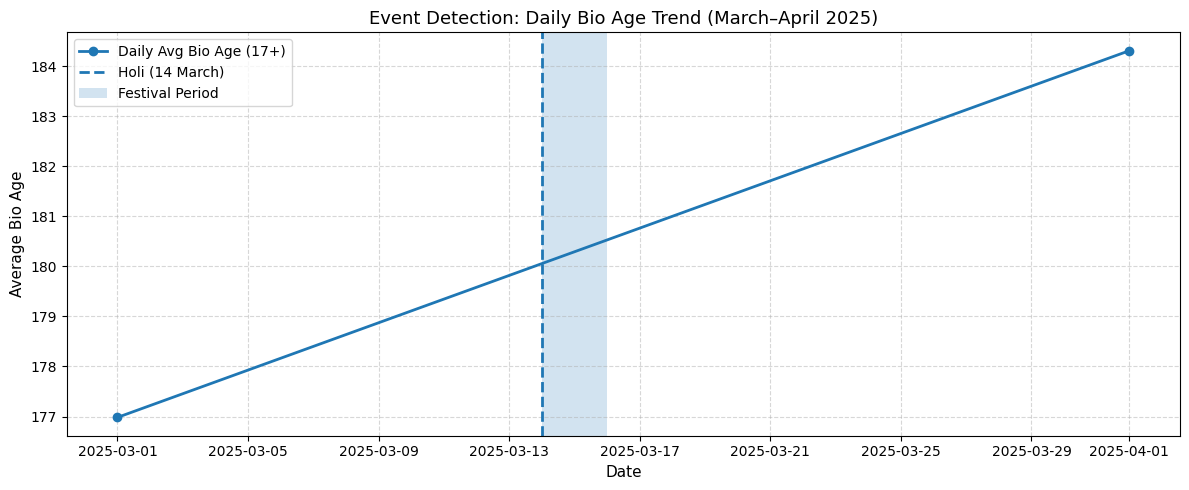

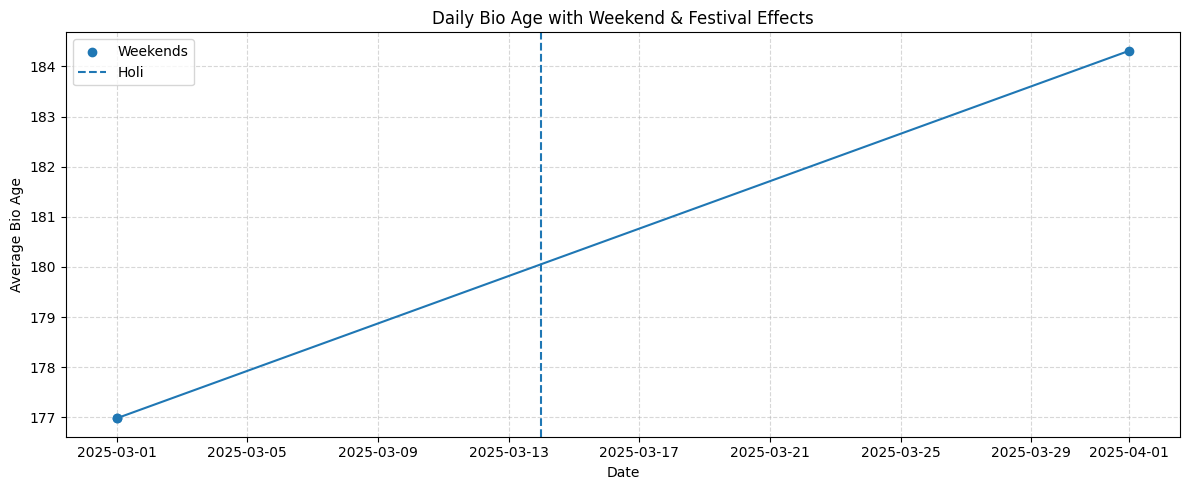

In [18]:
# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for March and April 2025
event_df = df[
    (df['date'] >= '2025-03-01') &
    (df['date'] <= '2025-04-30')
]
daily_avg = (
    event_df
    .groupby('date')['bio_age_17_']
    .mean()
    .reset_index()
)
daily_avg.head()
plt.figure(figsize=(12, 5))

plt.plot(
    daily_avg['date'],
    daily_avg['bio_age_17_'],
    marker='o',
    linewidth=2,
    label='Daily Avg Bio Age (17+)'
)

# Mark Holi
plt.axvline(
    pd.to_datetime('2025-03-14'),
    linestyle='--',
    linewidth=2,
    label='Holi (14 March)'
)

# Optional: Highlight festival window (14–16 March)
plt.axvspan(
    pd.to_datetime('2025-03-14'),
    pd.to_datetime('2025-03-16'),
    alpha=0.2,
    label='Festival Period'
)

plt.xlabel('Date', fontsize=11)
plt.ylabel('Average Bio Age', fontsize=11)
plt.title(
    'Event Detection: Daily Bio Age Trend (March–April 2025)',
    fontsize=13
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
daily_avg['weekday'] = daily_avg['date'].dt.weekday

weekends = daily_avg[daily_avg['weekday'] >= 5]

plt.figure(figsize=(12, 5))
plt.plot(daily_avg['date'], daily_avg['bio_age_17_'], marker='o')

plt.scatter(
    weekends['date'],
    weekends['bio_age_17_'],
    label='Weekends'
)

plt.axvline(pd.to_datetime('2025-03-14'), linestyle='--', label='Holi')

plt.xlabel('Date')
plt.ylabel('Average Bio Age')
plt.title('Daily Bio Age with Weekend & Festival Effects')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


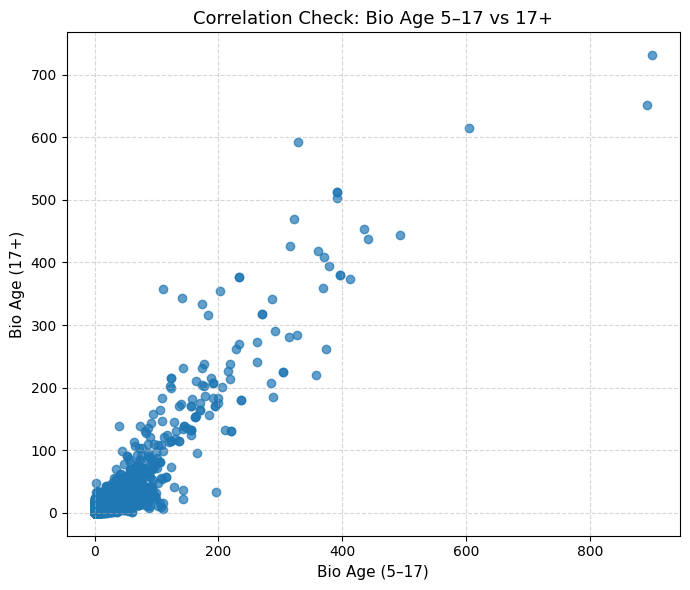

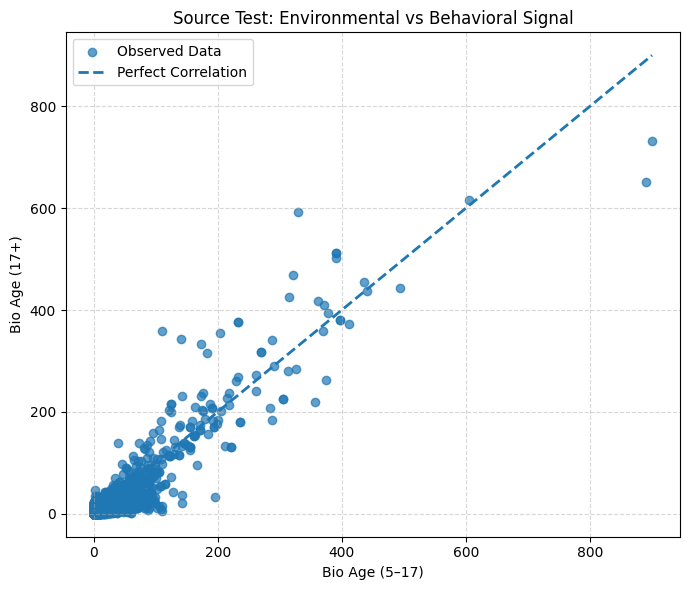

In [19]:
plt.figure(figsize=(7, 6))

plt.scatter(
    df['bio_age_5_17'],
    df['bio_age_17_'],
    alpha=0.7
)

plt.xlabel('Bio Age (5–17)', fontsize=11)
plt.ylabel('Bio Age (17+)', fontsize=11)
plt.title(
    'Correlation Check: Bio Age 5–17 vs 17+',
    fontsize=13
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
correlation = df['bio_age_5_17'].corr(df['bio_age_17_'])
correlation
plt.figure(figsize=(7, 6))

plt.scatter(
    df['bio_age_5_17'],
    df['bio_age_17_'],
    alpha=0.7,
    label='Observed Data'
)

# Perfect correlation reference line
min_val = min(df['bio_age_5_17'].min(), df['bio_age_17_'].min())
max_val = max(df['bio_age_5_17'].max(), df['bio_age_17_'].max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle='--',
    linewidth=2,
    label='Perfect Correlation'
)

plt.xlabel('Bio Age (5–17)')
plt.ylabel('Bio Age (17+)')
plt.title('Source Test: Environmental vs Behavioral Signal')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
